# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import make_scorer

D:\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing the dataset

In [2]:
# dataset = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_sine_sweep9_voltage.csv')
# dataset2= pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/sine_sweep9.csv')
# X = dataset.iloc[:, 0:4].values
# y = dataset2.iloc[:, 0].values
# #length_x = dataset2.iloc[:, 0].values
# #lengt=dataset1.iloc[:, -1].values
# X.shape

In [3]:
dataset1_1 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_trap_uniform_test1_voltage.csv')
dataset1_2 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_trap_uniform_test2_voltage.csv')
dataset1_3 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_trap_uniform_test3_voltage.csv')
dataset2_1 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/trap_uniform_test1.csv')
dataset2_2 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/trap_uniform_test2.csv')
dataset2_3 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/trap_uniform_test3.csv')

X = np.vstack((dataset1_1,dataset1_2,dataset1_3))
y = np.vstack((dataset2_1,dataset2_2,dataset2_3))
y = y[:, 1]
#X = dataset.iloc[:, 0:4].values
#y = dataset2.iloc[:, 1].values
#length_x = dataset2.iloc[:, 0].values
#lengt=dataset1.iloc[:, -1].values
X.shape

(52012, 4)

In [4]:
y.shape

(52012,)

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)

## Training the Random Forest Regression model

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

## Predicting new results

In [7]:
y_pred2 = regressor.predict(X)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y.reshape(len(y),1)),1))

[[4.98 5.02]
 [4.87 4.86]
 [4.87 4.87]
 ...
 [4.72 4.72]
 [4.74 4.74]
 [4.71 4.75]]


## Random Forest Regression results

In [8]:
#time_data = pd.read_csv('time_stair.csv')
#t = time_data.iloc[:, :].values

In [9]:
# np.savetxt('y_pred.csv',y_pred2)
# np.savetxt('y.csv',y)
# np.savetxt('time.csv',x1)

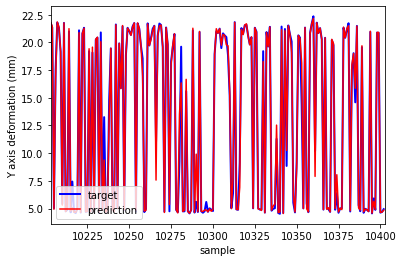

In [10]:
y_pred3 = regressor.predict(X_test)
plt.plot(y_test,'-b',linewidth=2)
plt.plot(y_pred3,'-r')
plt.xlim(len(y_pred3)-200, len(y_pred3))
plt.xlabel("sample")
plt.ylabel("Y axis deformation (mm)")
plt.legend(['target','prediction'],loc ="lower left")

## Error calculation



In [11]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score

In [12]:
y_pred2 = regressor.predict(X)
MSE = mean_squared_error(y, y_pred2)
 
RMSE = math.sqrt(MSE)
print("Mean Square Error:\n")
print(MSE)
print('R score is :', r2_score(y, y_pred2))

Mean Square Error:

0.15602508264112613
R score is : 0.9973475724179702


Training Error: Mean absolute error of target and prediction normalized with the length.

In [13]:
def mean_abs_error(y_true, y_predict):
  return (np.abs(np.array(y_true)-np.array(y_predict))/np.array(y_true)).mean()
  #return (np.abs(np.array(y_true)-np.array(y_predict))/np.array(y_true))
mean_abs_scorer = make_scorer(mean_abs_error, greater_is_better=False)

In [14]:
#error for y_pred2
error=mean_abs_error(np.transpose(y), np.transpose(y_pred2))
print(error)
#plt.plot(error)

0.013869285789809019


In [15]:
y_pred3 = regressor.predict(X_test)
error=mean_abs_error(y_test, y_pred3)

print(error)
#print(error.shape)
#plt.plot(error)

0.027525163241381056


Test Error: Mean absolute error of target and prediction normalized with the length.

In [16]:
#df = pd.DataFrame({"true" : y, "prediction" : y_pred2, "error" : normDiffTestAvg})
#df.to_csv("Data_SMA/RF_SMA_x.csv", index=False)

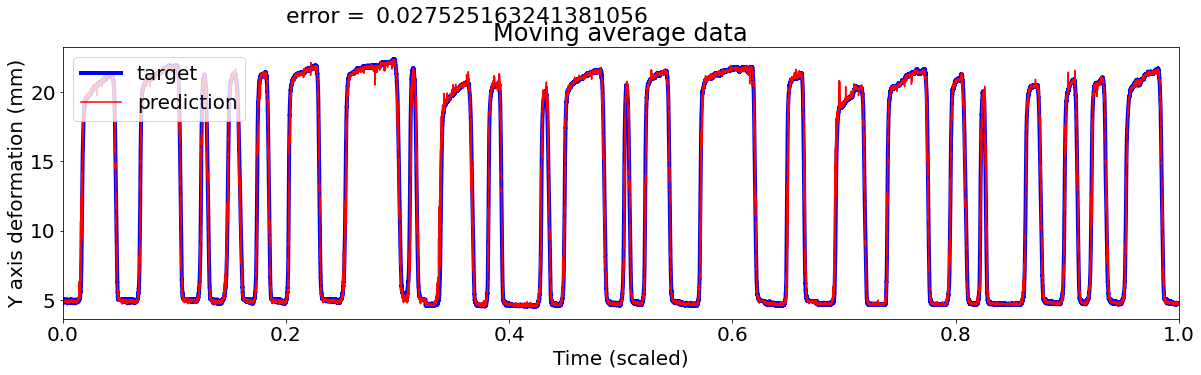

In [17]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (20,5)
x1=np.linspace(0, 1.0, num=len(y_pred2))
plt.plot(x1,y,'-b',linewidth=4)
plt.plot(x1,y_pred2,'-r')
#plt.ylim(-5,26)
#plt.ylim(45,95)
plt.legend(['target','prediction'],loc ="upper left")
plt.xlim(0, 1.0)
#plt.xlim(5, 120)
#plt.ylim(60, 70)
plt.xlabel("Time (scaled)")
plt.ylabel("Y axis deformation (mm)")
plt.text(0.2, 25, 'error =', fontsize = 22)
plt.text(0.28, 25, error, fontsize = 22)
plt.title('Moving average data')
plt.show()

(0.5, 1.0)

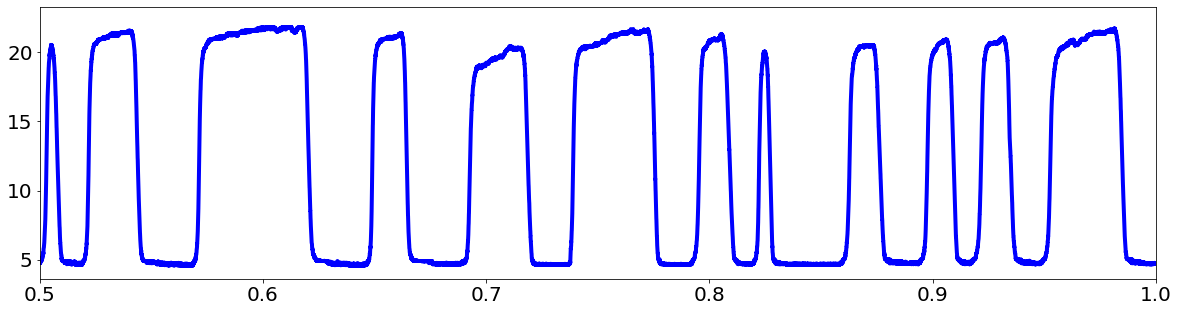

In [18]:
plt.plot(x1,y,'-b',linewidth=4)
plt.xlim(0.5, 1.0)

In [19]:
from scipy.io import savemat
#savemat('UnitRand_volt.mat', {'UnitRand_volt': X})
savemat('RF_sine_x.mat', {'RF_sine_x': np.transpose(y)})
savemat('RF_sine_xpred.mat', {'RF_sine_xpred': np.transpose(y_pred2)})
# savemat('trap_random_volt.mat', {'trap_random_volt': X})
# savemat('trap_random_x.mat', {'trap_random_x': np.transpose(y)})
# savemat('trap_random_xpred.mat', {'trap_random_xpred': np.transpose(y_pred2)})
#savemat('unit_uniform_Xpred.mat', y_pred2)

In [20]:
y_pred2.dtype

dtype('float64')

In [21]:
# dataset3 = pd.read_csv('C:/Users/Md Rafeul Shougat/data_for_ML_ver2/test9_sine_sweep_nf_voltage.csv')
# dataset4= pd.read_csv('C:/Users/Md Rafeul Shougat/data_for_ML_ver2/test9_sine_sweep_nf.csv')
# X_diff = dataset3.iloc[:, 0:4].values
# y_diff = dataset4.iloc[:, 1].values

In [22]:
# y_predDiff = regressor.predict(X_diff)
# error=mean_abs_error(y_diff, y_predDiff)
# print(error)

In [23]:
# plt.rcParams.update({'font.size': 20})
# plt.rcParams["figure.figsize"] = (20,5)
# x2=np.linspace(0, 1.0, num=len(y_predDiff))
# plt.plot(x2,y_diff,'-b',linewidth=2)
# plt.plot(x2,y_predDiff,'-r')
# #plt.ylim(-15,45)
# #plt.ylim(45,95)
# plt.legend(['target','prediction'],loc ="lower left")
# #plt.xlim(0.8, 1.0)
# #plt.xlim(5, 120)
# #plt.ylim(63, 69)
# plt.xlabel("Time (scaled)")
# plt.ylabel("Y axis deformation (mm)")
# # plt.text(0, 17.8, 'error =', fontsize = 22)
# # plt.text(0.08, 17.8, error, fontsize = 22)
# #plt.title('SMA actuator position with random forest regression')
# plt.show()